# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [351]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error 

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


## Regression Model Evaluation

In [352]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [353]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [354]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [355]:
df = data.copy()

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [356]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [357]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

In [358]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

r2_score_test = r2_score(y_test, test_predictions)
r2_score_train = r2_score(y_train, train_predictions)

print("Test R2 Score:", r2_score_test)
print("Train R2 Score:", r2_score_train)


Test R2 Score: 0.6687594935356347
Train R2 Score: 0.7508856358979672


## 4. Calculate and print mean squared error for both the training and the testing set.

In [359]:
RMSE_3_test = root_mean_squared_error(y_test, test_predictions)
print("Test RMSE:", RMSE_3_test)

RMSE_3_train = root_mean_squared_error(y_train, train_predictions)
print("Train RMSE:", RMSE_3_train)


Test RMSE: 4.928602182665316
Train RMSE: 4.6520331848801675


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [360]:
MAE_test = mean_absolute_error(y_test, test_predictions)
print("Test MAE:", MAE_test)

MAE_train = mean_absolute_error(y_train, train_predictions)
print("Train MAE:", MAE_train)


Test MAE: 3.189091965887816
Train MAE: 3.314771626783226


## Classification Model Evaluation

In [361]:
from sklearn.datasets import load_iris
data = load_iris()

In [362]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [363]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [364]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [365]:
column_names = data.feature_names

In [366]:
df = pd.DataFrame(data['data'],columns=column_names)

In [367]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [368]:
target = pd.DataFrame(data.target)

In [369]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [370]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [371]:
X = df
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [372]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [373]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Accuracy of predicted testing data:", accuracy_score(y_test, y_test_pred))
print("Accuracy of predicted training data:", accuracy_score(y_train, y_train_pred))

Accuracy of predicted testing data: 1.0
Accuracy of predicted training data: 0.975


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [374]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy of predicted testing data:", balanced_accuracy_score(y_test, y_test_pred))
print("Balanced Accuracy of predicted training data:", balanced_accuracy_score(y_train, y_train_pred))

Balanced Accuracy of predicted testing data: 1.0
Balanced Accuracy of predicted training data: 0.975609756097561


## 10. Calculate and print the precision score for both the training and the testing set.

In [375]:
from sklearn.metrics import precision_score
print("Precision Score of predicted testing data:", precision_score(y_test, y_test_pred, average="macro"))
print("Precision Score of predicted training data:", precision_score(y_train, y_train_pred, average="macro"))

Precision Score of predicted testing data: 1.0
Precision Score of predicted training data: 0.9761904761904763


## 11. Calculate and print the recall score for both the training and the testing set.

In [376]:
from sklearn.metrics import recall_score
print("Recall Score of predicted testing data:", recall_score(y_test, y_test_pred, average="macro"))
print("Recall Score of predicted training data:", recall_score(y_train, y_train_pred, average="macro"))

Recall Score of predicted testing data: 1.0
Recall Score of predicted training data: 0.975609756097561


## 12. Calculate and print the F1 score for both the training and the testing set.

In [377]:
from sklearn.metrics import f1_score
print("Recall Score of predicted testing data:", f1_score(y_test, y_test_pred, average="macro"))
print("Recall Score of predicted training data:", f1_score(y_train, y_train_pred, average="macro"))

Recall Score of predicted testing data: 1.0
Recall Score of predicted training data: 0.974996093139553


## 13. Generate confusion matrices for both the training and the testing set.

In [378]:
cm = confusion_matrix(y_test, y_test_pred)

<Figure size 800x600 with 0 Axes>

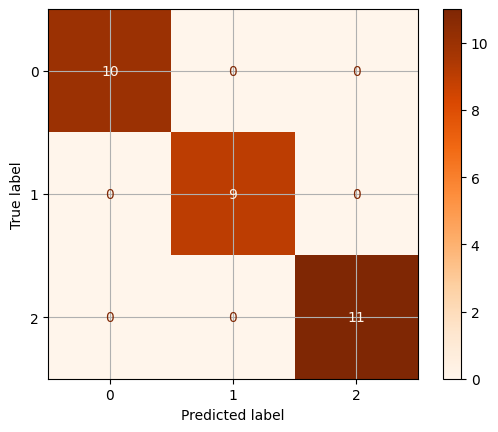

In [379]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [381]:
cm = confusion_matrix(y_train, y_train_pred)

<Figure size 800x600 with 0 Axes>

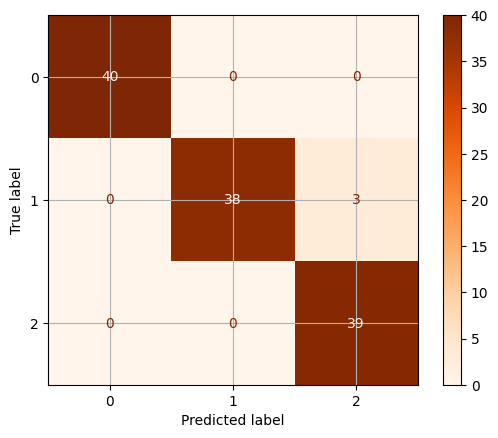

In [382]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [380]:
# Have fun here !